# Exploring Extracted Logits

This notebook demonstrates how to explore and visualize extracted logit data.

In [1]:
# Import all exploration functions
from explore_logits import *
import matplotlib.pyplot as plt
import numpy as np

# Set up plotting style
plt.style.use('default')
%matplotlib inline

In [2]:
import datasets

In [3]:
ds = datasets.load_dataset("seba/devLogits-Q3-0.6B-4")

part-00000.parquet:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11 [00:00<?, ? examples/s]

In [4]:
ds['train'][0]

{'index': 874131,
 'num_tokens': 411,
 'top_indices_low': [[20596],
  [18927],
  [429],
  [264],
  [9015],
  [7714],
  [686],
  [5258],
  [279, 264],
  [3070, 3175],
  [2975],
  [315],
  [279],
  [1615],
  [436],
  [3075],
  [50715],
  [11, 2337, 1447, 304],
  [752],
  [24624],
  [11, 304, 1447],
  [582, 1077],
  [594],
  [1438, 23643, 1795, 728, 10354, 1156, 1191, 4227, 2908],
  [432, 1495, 279],
  [3491, 1882, 6534, 15048, 6358],
  [1495, 1119],
  [1447, 3019, 382],
  [553],
  [3019],
  [382],
  [14374, 44364],
  [16246, 5309, 14822, 220, 3070, 17838, 24800, 48286],
  [22043, 1592, 8304, 16, 4615, 54647, 31198, 35],
  [13],
  [45451,
   55047,
   34218,
   4127,
   5309,
   5358,
   17838,
   16246,
   45111,
   10657,
   3251,
   14625,
   34807,
   8590,
   17230,
   21517,
   3555,
   18448,
   3321,
   9316,
   3128,
   5624,
   17022,
   28596,
   576,
   1640,
   422,
   17750,
   3247,
   50467,
   22079,
   24800,
   25903,
   5351,
   9608,
   27379,
   4697,
   15552,
   48

## 1. Load Dataset

In [4]:
# Replace with your dataset ID
DATASET_ID = "seba/devLogits-Q3-0.6B-4"

# Load the dataset
ds = load_logit_dataset(DATASET_ID)
print(f"Dataset has {len(ds)} samples")

📦 Loading dataset: seba/devLogits-Q3-0.6B-4
✅ Loaded 11 samples
Dataset has 11 samples


## 2. Explore a Single Sample

In [5]:
# Get a sample
sample = get_sample(ds, index=0)

# Print information about the sample
print_sample_info(sample, verbose=True)

SAMPLE INFO - Index: 874131
Number of tokens: 411

Nucleus (top-p) logits: 411 per token
Sampled logits: 411 total

Data structure:
  - top_indices: <class 'list'> of length 411
  - top_logits_quantized: <class 'list'>
  - top_min: <class 'list'>, length 411
  - top_max: <class 'list'>, length 411
  - sampled_indices: <class 'list'>
  - sampled_logits_quantized: <class 'list'>
  - logsumexp: <class 'list'>, length 411


In [11]:
ds[0]['top_counts']

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 3,
 2,
 1,
 9,
 3,
 5,
 2,
 3,
 1,
 1,
 1,
 2,
 8,
 8,
 1,
 54,
 1,
 100,
 2,
 21,
 1,
 4,
 3,
 2,
 6,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 2,
 4,
 9,
 2,
 1,
 1,
 1,
 1,
 2,
 29,
 6,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 10,
 2,
 3,
 2,
 13,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 7,
 1,
 2,
 1,
 1,
 1,
 12,
 1,
 5,
 5,
 9,
 2,
 19,
 16,
 1,
 8,
 7,
 8,
 16,
 21,
 1,
 1,
 8,
 67,
 29,
 11,
 32,
 3,
 35,
 5,
 33,
 58,
 69,
 32,
 26,
 15,
 8,
 29,
 14,
 8,
 14,
 3,
 3,
 10,
 1,
 20,
 23,
 100,
 13,
 7,
 1,
 1,
 1,
 100,
 1,
 20,
 24,
 3,
 1,
 1,
 72,
 1,
 5,
 1,
 1,
 4,
 1,
 51,
 55,
 95,
 62,
 12,
 1,
 2,
 1,
 3,
 37,
 60,
 1,
 26,
 100,
 7,
 87,
 15,
 88,
 100,
 25,
 18,
 20,
 1,
 3,
 100,
 100,
 1,
 22,
 4,
 31,
 2,
 1,
 1,
 1,
 2,
 10,
 5,
 54,
 4,
 3,
 11,
 3,
 1,
 10,
 1,
 9,
 1,
 1,
 17,
 3,
 43,
 9,
 34,
 7,
 12,
 19,
 79,
 1,
 23,
 15,
 13,
 28,
 28,
 98,
 1,
 28,
 29,
 12,
 1,
 1,
 3,
 1,
 1,
 19,
 7,
 1,
 4,
 6,
 63,
 1

In [7]:
sample['sampled_indices'][0]

array([151667,  32313, 140397,    334,   2346,   1019, 151644,  23065,
       151665,   1249, 151657, 138210,  27364,   1950,  21395,  11921,
        42178, 125450,   7714,   1853,  71703,  40451,  74397,  46045],
      dtype=int32)

In [16]:
sample['top_indices']

[array([151668], dtype=int32),
 array([18927], dtype=int32),
 array([429], dtype=int32),
 array([264], dtype=int32),
 array([9015], dtype=int32),
 array([7714], dtype=int32),
 array([686], dtype=int32),
 array([5258], dtype=int32),
 array([279, 264], dtype=int32),
 array([3070, 3175], dtype=int32),
 array([2975], dtype=int32),
 array([315], dtype=int32),
 array([279], dtype=int32),
 array([1615], dtype=int32),
 array([436], dtype=int32),
 array([3075], dtype=int32),
 array([50715], dtype=int32),
 array([  11, 2337, 1447,  304], dtype=int32),
 array([752], dtype=int32),
 array([90160], dtype=int32),
 array([  11,  304, 1447], dtype=int32),
 array([ 582, 1077], dtype=int32),
 array([594], dtype=int32),
 array([ 1438, 23643,  1795,   728, 10354,  1156,  1191,  4227,  2908],
       dtype=int32),
 array([ 432, 1495,  279], dtype=int32),
 array([ 3491,  1882,  6534, 15048,  6358], dtype=int32),
 array([1495, 1119], dtype=int32),
 array([1447, 3019,  382], dtype=int32),
 array([553], dtype=in

## 3. Visualize Nucleus Sizes

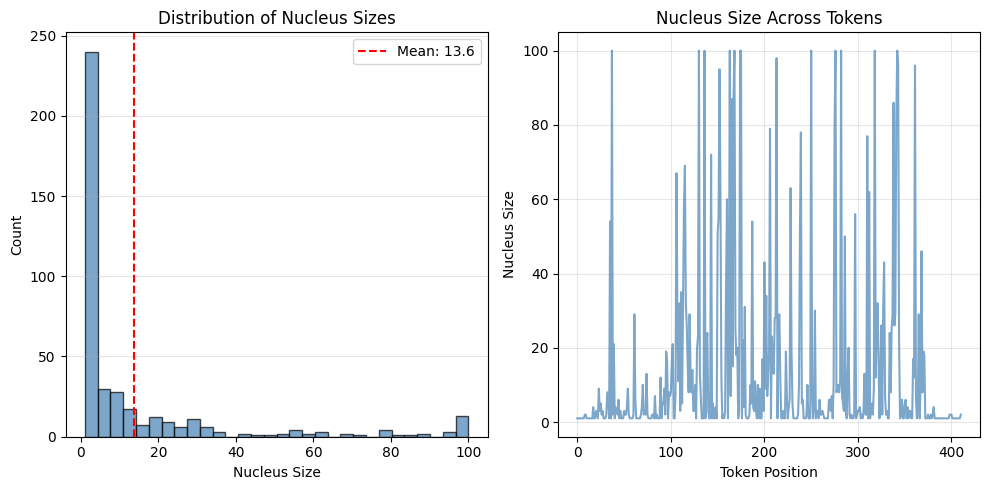


Nucleus Size Statistics:
  Min: 1
  Max: 100
  Mean: 13.60
  Median: 3.00
  Std: 23.85


In [9]:
# Show how nucleus size varies across tokens
plot_nucleus_sizes(sample)

## 4. Inspect a Specific Token

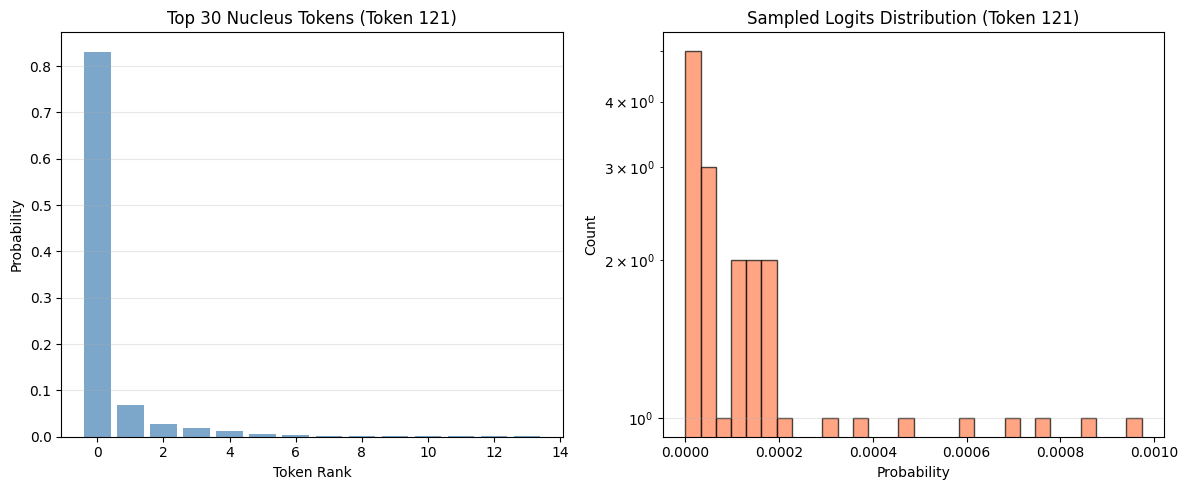


Token 121 Statistics:
  Nucleus size: 14
  Nucleus probability mass: 0.9791
  Top token probability: 0.8311
  Sampled tokens: 24
  Sampled prob range: [7.13e-07, 9.73e-04]


In [10]:
# Choose a token to inspect
TOKEN_IDX = 121

# Plot logit distribution for this token
plot_logit_distribution(sample, token_idx=TOKEN_IDX, show_top_n=30)

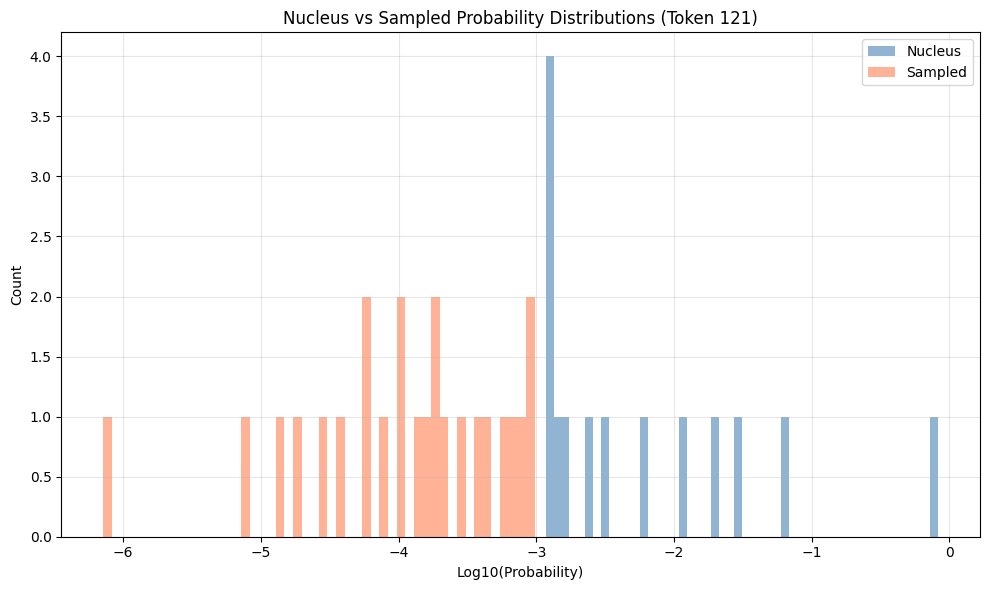

In [11]:
# Compare nucleus vs sampled distributions
plot_nucleus_vs_sampled(sample, token_idx=TOKEN_IDX)

## 5. Dequantize and Inspect Logits

In [8]:
# Dequantize nucleus logits
nucleus_indices, nucleus_logits = dequantize_top_logits(sample, token_idx=TOKEN_IDX)

print(f"Nucleus has {len(nucleus_indices)} tokens")
print(f"Top 5 logit values: {nucleus_logits[:5]}")
print(f"Top 5 token indices: {nucleus_indices[:5]}")

Nucleus has 14 tokens
Top 5 logit values: [20.625    18.124971 17.249971 16.874958 16.374971]
Top 5 token indices: [ 2975    11 50715  4982   825]


In [10]:
# Dequantize sampled logits
sampled_indices, sampled_logits = dequantize_sampled_logits(sample, token_idx=TOKEN_IDX)

print(f"Sampled has {len(sampled_indices)} tokens")
print(f"Sampled logit range: [{sampled_logits.min():.3f}, {sampled_logits.max():.3f}]")

Sampled has 24 tokens
Sampled logit range: [6.031, 13.875]


In [11]:
# Get all logits at once
logits_dict = dequantize_all_logits(sample, token_idx=TOKEN_IDX)

print("Keys in logits_dict:", logits_dict.keys())
print(f"LogSumExp: {logits_dict['logsumexp']:.3f}")

# Check nucleus probability mass
nucleus_mass = get_nucleus_probability_mass(sample, token_idx=TOKEN_IDX)
print(f"\nNucleus captures {nucleus_mass*100:.2f}% of probability mass")

Keys in logits_dict: dict_keys(['nucleus_indices', 'nucleus_logits', 'sampled_indices', 'sampled_logits', 'logsumexp'])
LogSumExp: 20.810

Nucleus captures 97.91% of probability mass


In [12]:
logits_dict

{'nucleus_indices': array([ 2975,    11, 50715,  4982,   825,   323, 41930,   701, 21372,
         1615,  5944,  6716,  2779, 66140], dtype=int32),
 'nucleus_logits': array([20.625   , 18.124971, 17.249971, 16.874958, 16.374971, 15.750014,
        14.999986, 14.750043, 14.437514, 14.312543, 14.187471, 14.187471,
        14.0625  , 14.0625  ], dtype=float32),
 'sampled_indices': array([ 1059, 24203, 23604, 11777, 45800, 69410,   476,  6857, 46020,
         3070,  4998, 49838,     8,  8781, 61507, 89373,  3593,  1340,
        11582,   568, 19041,  2319, 97184,  3692], dtype=int32),
 'sampled_logits': array([10.437443 , 10.68747  , 11.937491 ,  7.531299 , 13.875    ,
        13.187512 , 13.750046 ,  6.437471 , 13.374944 , 12.500025 ,
        13.562494 ,  8.99999  , 13.812523 , 12.624979 , 11.312481 ,
         6.03125  , 12.062446 ,  8.5625305, 11.56251  , 11.812537 ,
         8.312502 , 11.500032 , 13.624971 , 11.187527 ], dtype=float32),
 'logsumexp': 20.809946060180664}

In [13]:
logits_dict

{'nucleus_indices': array([ 2975,    11, 50715,  4982,   825,   323, 41930,   701, 21372,
         1615,  5944,  6716,  2779, 66140], dtype=int32),
 'nucleus_logits': array([20.625   , 18.124971, 17.249971, 16.874958, 16.374971, 15.750014,
        14.999986, 14.750043, 14.437514, 14.312543, 14.187471, 14.187471,
        14.0625  , 14.0625  ], dtype=float32),
 'sampled_indices': array([ 1059, 24203, 23604, 11777, 45800, 69410,   476,  6857, 46020,
         3070,  4998, 49838,     8,  8781, 61507, 89373,  3593,  1340,
        11582,   568, 19041,  2319, 97184,  3692], dtype=int32),
 'sampled_logits': array([10.437443 , 10.68747  , 11.937491 ,  7.531299 , 13.875    ,
        13.187512 , 13.750046 ,  6.437471 , 13.374944 , 12.500025 ,
        13.562494 ,  8.99999  , 13.812523 , 12.624979 , 11.312481 ,
         6.03125  , 12.062446 ,  8.5625305, 11.56251  , 11.812537 ,
         8.312502 , 11.500032 , 13.624971 , 11.187527 ], dtype=float32),
 'logsumexp': 20.809946060180664}

## 6. Decode Tokens (Optional - requires model)

In [12]:
# Load tokenizer to decode token IDs to strings
from transformers import AutoTokenizer

# Replace with the model you used for extraction
MODEL_ID = "Qwen/Qwen3-0.6B"

tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

In [14]:
# Print top tokens with their probabilities
print_top_tokens(sample, token_idx=TOKEN_IDX, tokenizer=tokenizer, top_k=20)


Top 14 tokens for position 121:
--------------------------------------------------
  1.  copy                           0.83115 (83.11%)
  2. ,                               0.06822 ( 6.82%)
  3.  chromosome                     0.02844 ( 2.84%)
  4.  unit                           0.01955 ( 1.95%)
  5.  one                            0.01186 ( 1.19%)
  6.  and                            0.00635 ( 0.63%)
  7.  molecule                       0.00300 ( 0.30%)
  8. ),                              0.00233 ( 0.23%)
  9.  chrom                          0.00171 ( 0.17%)
 10.  mon                            0.00151 ( 0.15%)
 11.  structure                      0.00133 ( 0.13%)
 12.  pair                           0.00133 ( 0.13%)
 13.  cell                           0.00117 ( 0.12%)
 14. -copy                           0.00117 ( 0.12%)
--------------------------------------------------


## 7. Compute Dataset Statistics

In [16]:
# Compute stats across the dataset (may take a while for large datasets)
stats = compute_dataset_stats(ds, max_samples=1000)  # Limit to first 1000 samples

# Print statistics
print_dataset_stats(stats)

📊 Computing dataset statistics...
✅ Processed 50 samples with 50519 total tokens

DATASET STATISTICS
Total samples: 50
Total tokens: 50,519
Avg tokens per sample: 1010.4

Nucleus sizes:
  Min: 1
  Max: 100
  Mean: 9.87
  Median: 1.00


## 8. Quick Exploration (All-in-One)

For quick analysis, use the `quick_explore` function:

📦 Loading dataset: seba/devLogits-Q3-0.6B
✅ Loaded 50 samples
SAMPLE INFO - Index: 874131
Number of tokens: 411

Nucleus (top-p) logits:
  - Variable length per token
  - Min size: 1, Max size: 100, Avg: 13.6
Sampled logits: 24 per token

Data structure:
  - top_indices: <class 'list'> of length 411
  - top_logits_quantized: <class 'list'>
  - top_min: <class 'list'>, length 411
  - top_max: <class 'list'>, length 411
  - sampled_indices: <class 'list'>
  - sampled_logits_quantized: <class 'list'>
  - logsumexp: <class 'list'>, length 411


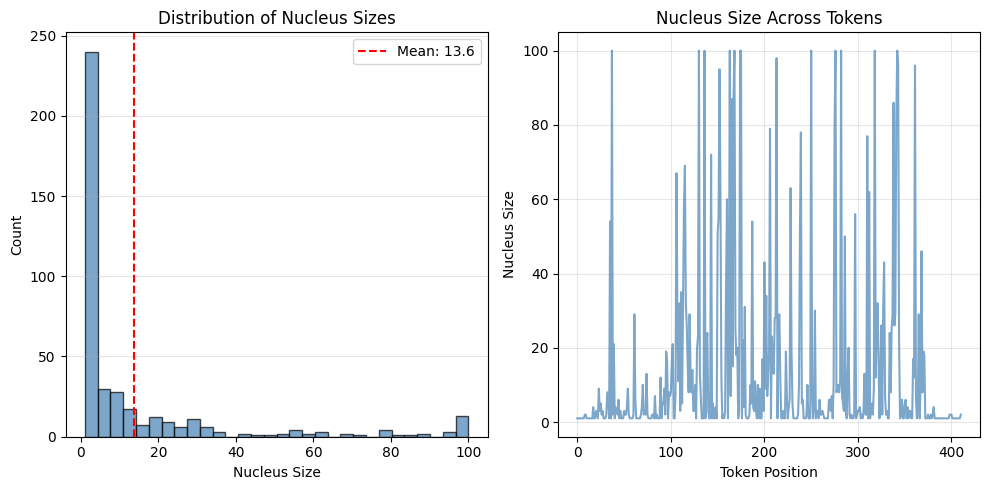


Nucleus Size Statistics:
  Min: 1
  Max: 100
  Mean: 13.60
  Median: 3.00
  Std: 23.85


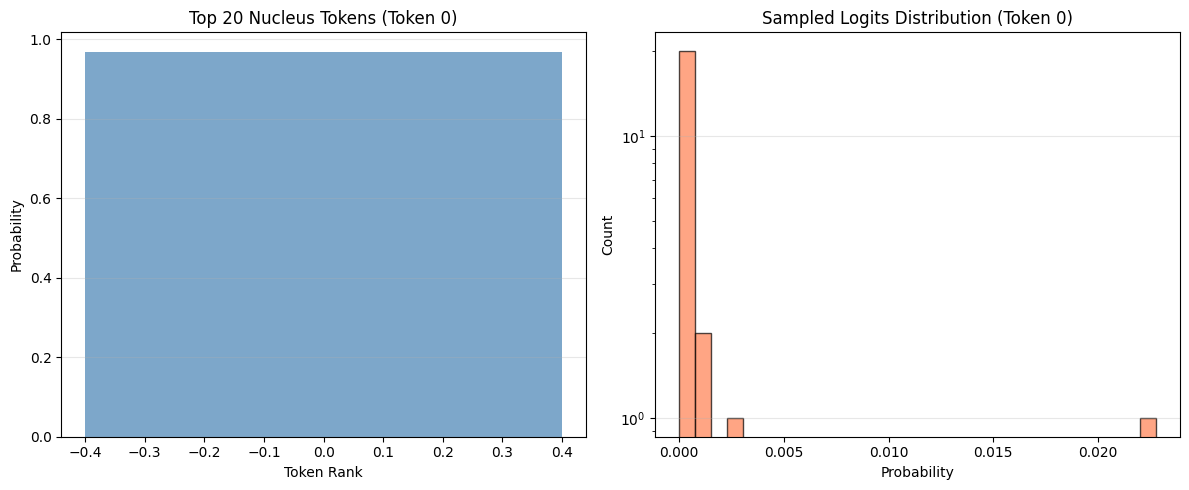


Token 0 Statistics:
  Nucleus size: 1
  Nucleus probability mass: 0.9689
  Top token probability: 0.9689
  Sampled tokens: 24
  Sampled prob range: [5.43e-09, 2.28e-02]


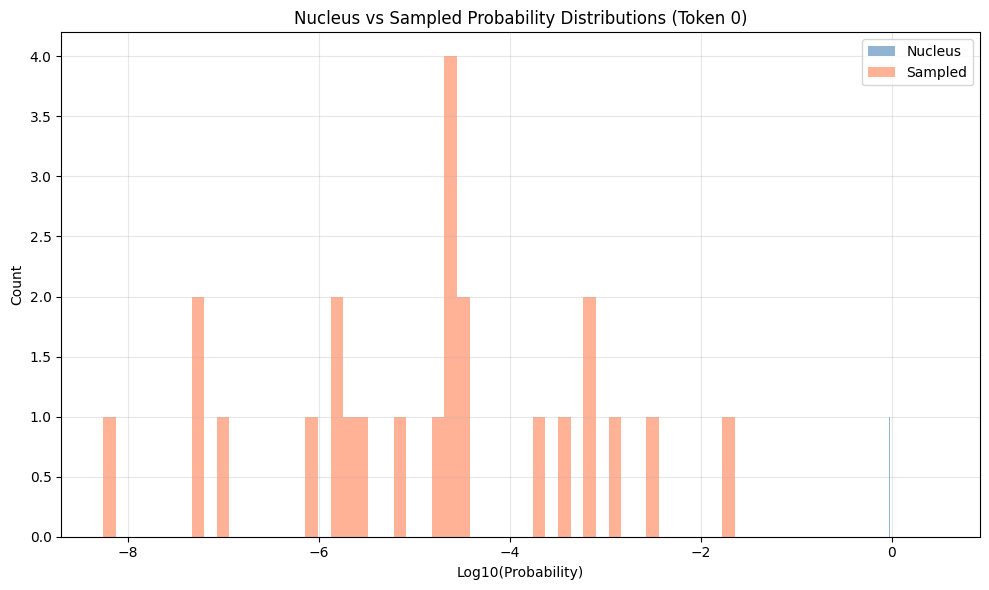


🤖 Loading tokenizer: Qwen/Qwen3-0.6B

Top 1 tokens for position 0:
--------------------------------------------------
  1. </think>                        0.96887 (96.89%)
--------------------------------------------------


In [17]:
# Quick exploration with all visualizations
quick_explore(
    dataset_id=DATASET_ID,
    sample_idx=0,
    token_idx=0,
    model_id=MODEL_ID  # Optional, for token decoding
)

## 9. Custom Analysis

Example: Compare logit distributions across multiple tokens

In [ ]:
# Compare top token probabilities across positions
token_positions = range(min(10, sample['num_tokens']))
top_probs = []

for token_idx in token_positions:
    indices, logits = dequantize_top_logits(sample, token_idx)
    lse = sample['logsumexp'][token_idx]
    probs = logits_to_probs(logits, lse)
    top_probs.append(probs[0])  # Probability of top token

plt.figure(figsize=(10, 5))
plt.plot(token_positions, top_probs, marker='o', linewidth=2)
plt.xlabel('Token Position')
plt.ylabel('Top Token Probability')
plt.title('Confidence (Top Token Probability) Across Sequence')
plt.grid(alpha=0.3)
plt.show()

print(f"Average top token probability: {np.mean(top_probs):.3f}")
print(f"Min: {min(top_probs):.3f}, Max: {max(top_probs):.3f}")

## 10. Export Data for Further Analysis

In [ ]:
# Example: Export top-5 tokens for each position to CSV
import pandas as pd

data = []
for token_idx in range(sample['num_tokens']):
    indices, logits = dequantize_top_logits(sample, token_idx)
    lse = sample['logsumexp'][token_idx]
    probs = logits_to_probs(logits, lse)
    
    for rank in range(min(5, len(indices))):
        data.append({
            'token_position': token_idx,
            'rank': rank + 1,
            'token_id': indices[rank],
            'logit': logits[rank],
            'probability': probs[rank]
        })

df = pd.DataFrame(data)
print(df.head(10))

# Optionally save to CSV
# df.to_csv('top_tokens.csv', index=False)